In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities.data_visualizers import view_value_frequency, describe_col, visualize_graph
from utilities.data_loaders import load_raw_ratings_large, load_raw_kg_20k

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
ml_1m_ratings = load_raw_ratings_large('./data/ml-1m')
ml_1m_ratings

d:\Projects\To Github\phil-jurisprudence-recsys\utilities\data_loaders.py:34: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = open(f'{dir_path}/ratings.dat', 'rb')


,user_id,item_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


# userId column

In [208]:
describe_col(ml_1m_ratings, 'user_id')

count/no. of occurences of each unique user_id out of 1000209: 

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: user_id, Length: 6040, dtype: int64
[   1    2    3 ... 6038 6039 6040]
total unique values: 6040


# itemId column

In [209]:
describe_col(ml_1m_ratings, 'item_id')

count/no. of occurences of each unique item_id out of 1000209: 

2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: item_id, Length: 3706, dtype: int64
[1193  661  914 ... 2845 3607 2909]
total unique values: 3706


# rating column

In [210]:
describe_col(ml_1m_ratings, 'rating')

count/no. of occurences of each unique rating out of 1000209: 

4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64
[5 3 4 2 1]
total unique values: 5


In [211]:
user_id_counts = ml_1m_ratings['user_id'].value_counts()
item_id_counts = ml_1m_ratings['item_id'].value_counts()
print(user_id_counts)
print(item_id_counts)

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: user_id, Length: 6040, dtype: int64
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: item_id, Length: 3706, dtype: int64


3021    20
4628    20
2111    20
5525    20
1406    20
5380    20
4178    20
2696    20
3291    20
4068    20
2584    20
5027    20
3530    20
250     20
5258    20
4383    20
4244    20
3552    20
3883    20
4547    20
4365    20
4749    20
2037    20
98      20
6038    20
4192    20
1351    20
947     20
2061    20
2714    20
2759    20
1452    20
2819    20
1493    20
2128    20
2884    20
2673    20
5533    20
932     20
2133    20
2930    20
4775    20
2381    20
4419    20
5159    20
3273    20
5168    20
761     20
5314    20
1993    20
Name: user_id, dtype: int64


d:\Projects\To Github\phil-jurisprudence-recsys\utilities\data_visualizers.py:86: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data = value_counts.sort_values(ascending=True)[:limit]


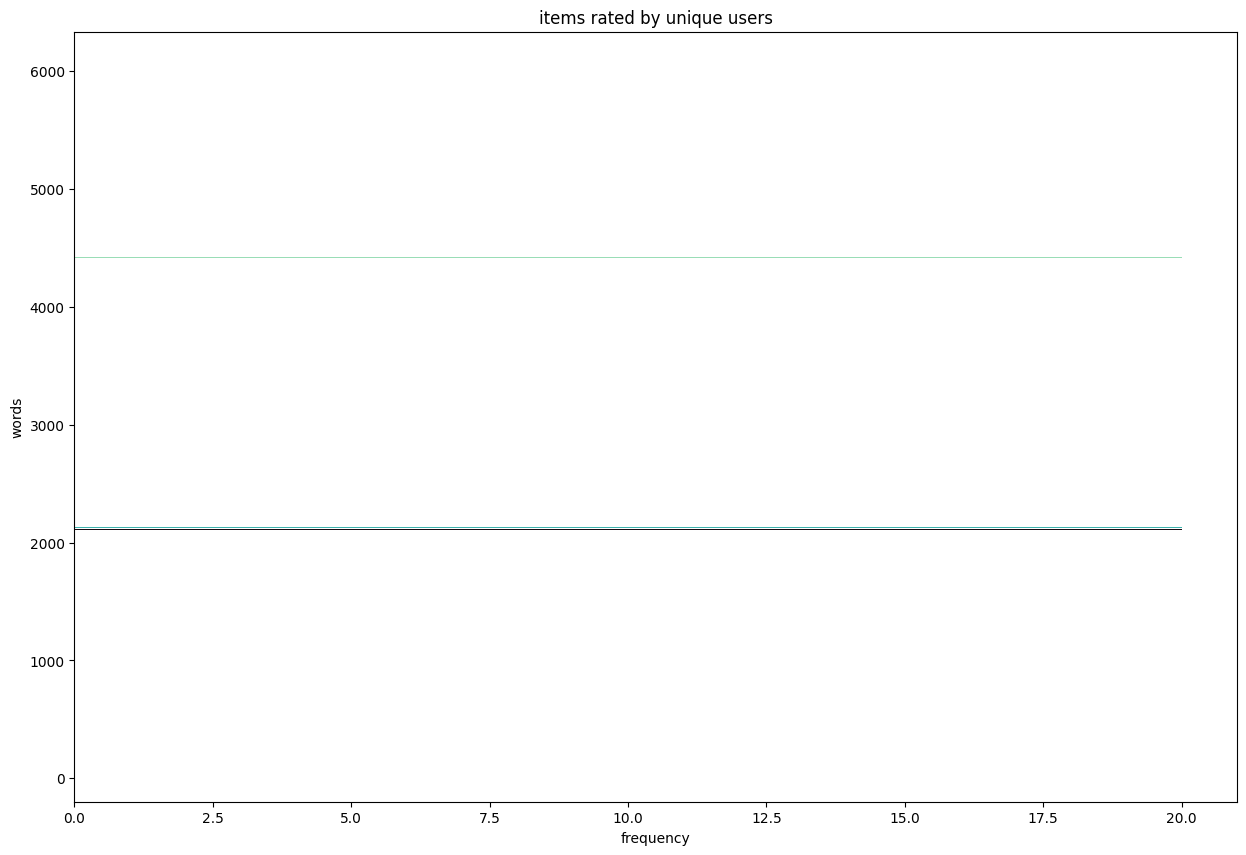

2909    1
3382    1
1843    1
1316    1
868     1
3656    1
133     1
286     1
3530    1
3290    1
1709    1
3164    1
792     1
644     1
3172    1
3237    1
2619    1
3722    1
2563    1
3904    1
579     1
2235    1
2277    1
3220    1
1630    1
2484    1
878     1
1852    1
226     1
3323    1
2308    1
1832    1
3376    1
3607    1
3065    1
2845    1
3202    1
2703    1
2217    1
3842    1
624     1
2213    1
396     1
311     1
3315    1
2214    1
701     1
763     1
2218    1
3229    1
Name: item_id, dtype: int64


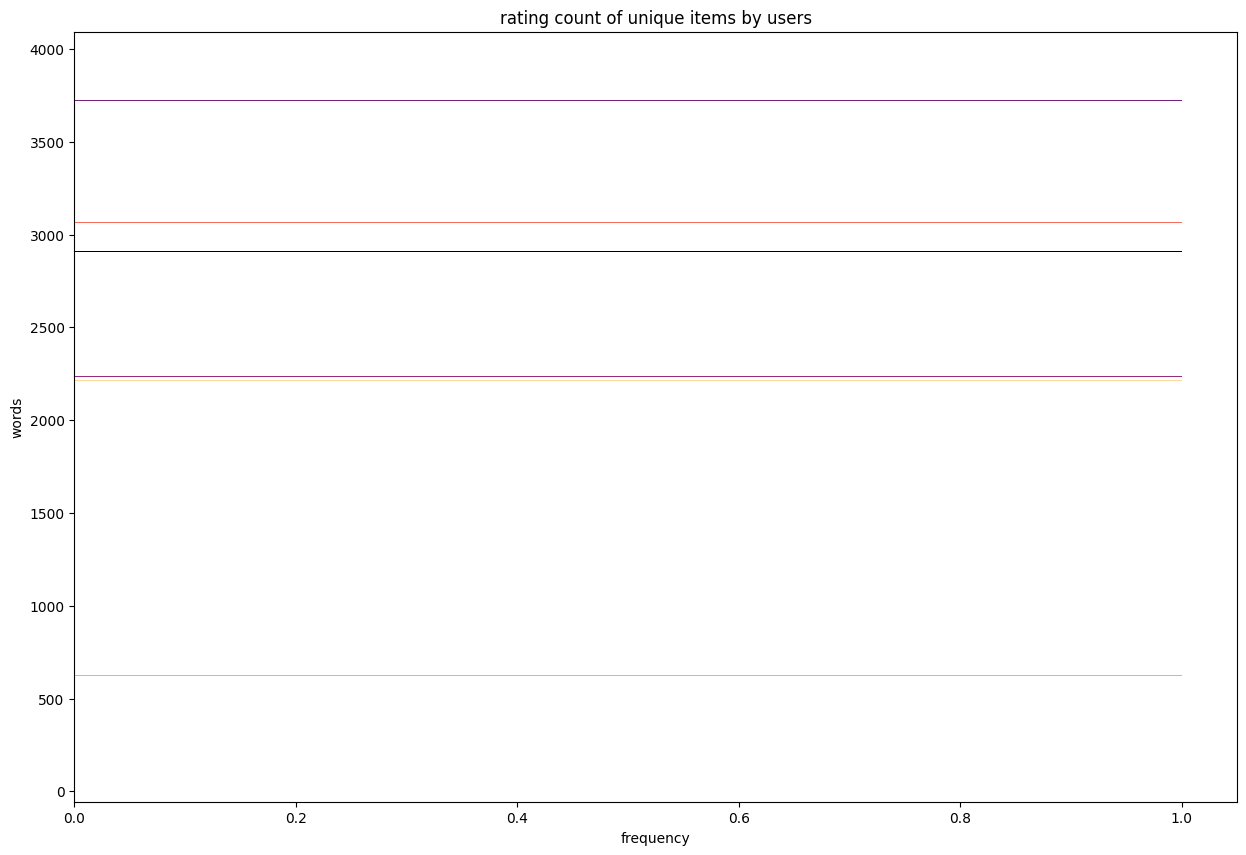

In [212]:
view_value_frequency(user_id_counts, colormap='mako', title='items rated by unique users', limit=50)
view_value_frequency(item_id_counts, colormap='magma', title='rating count of unique items by users', limit=50)

# Insights:
1. In 1m rows of ratings there are 6040 unique users
2. In 1m rows of ratings there are 3706 unique items that were rated

# Knowledge Graph/Network analysis

In [213]:
# 20782 rows
kg = load_raw_kg_20k('./data/ml1m-kg20k/')
kg

,head,relation,tail
0,749,film.film.writer,2347
1,1410,film.film.language,2348
2,1037,film.film.language,2348
3,1088,film.film.writer,2349
4,1391,film.film.language,2348
...,...,...,...
20777,2308,film.film.writer,4284
20778,869,film.film.language,2348
20779,1953,film.film.genre,2362
20780,2705,film.film.director,5417


In [214]:
describe_col(kg, 'head')

count/no. of occurences of each unique head out of 20782: 

1200    24
2230    24
2231    23
2123    22
1161    18
        ..
489      2
468      2
2072     2
967      2
2282     1
Name: head, Length: 2445, dtype: int64
[ 749 1410 1037 ... 2072 1560 2282]
total unique values: 2445


count/no. of occurences of each unique relation out of 20782: 

film.film.genre       5271
film.film.writer      3476
film.film.language    3135
film.film.director    2581
film.film.country     2256
film.film.star        2164
film.film.rating      1899
Name: relation, dtype: int64
['film.film.writer' 'film.film.language' 'film.film.genre'
 'film.film.star' 'film.film.country' 'film.film.rating'
 'film.film.director']
total unique values: 7
film.film.rating      1899
film.film.star        2164
film.film.country     2256
film.film.director    2581
film.film.language    3135
film.film.writer      3476
film.film.genre       5271
Name: relation, dtype: int64


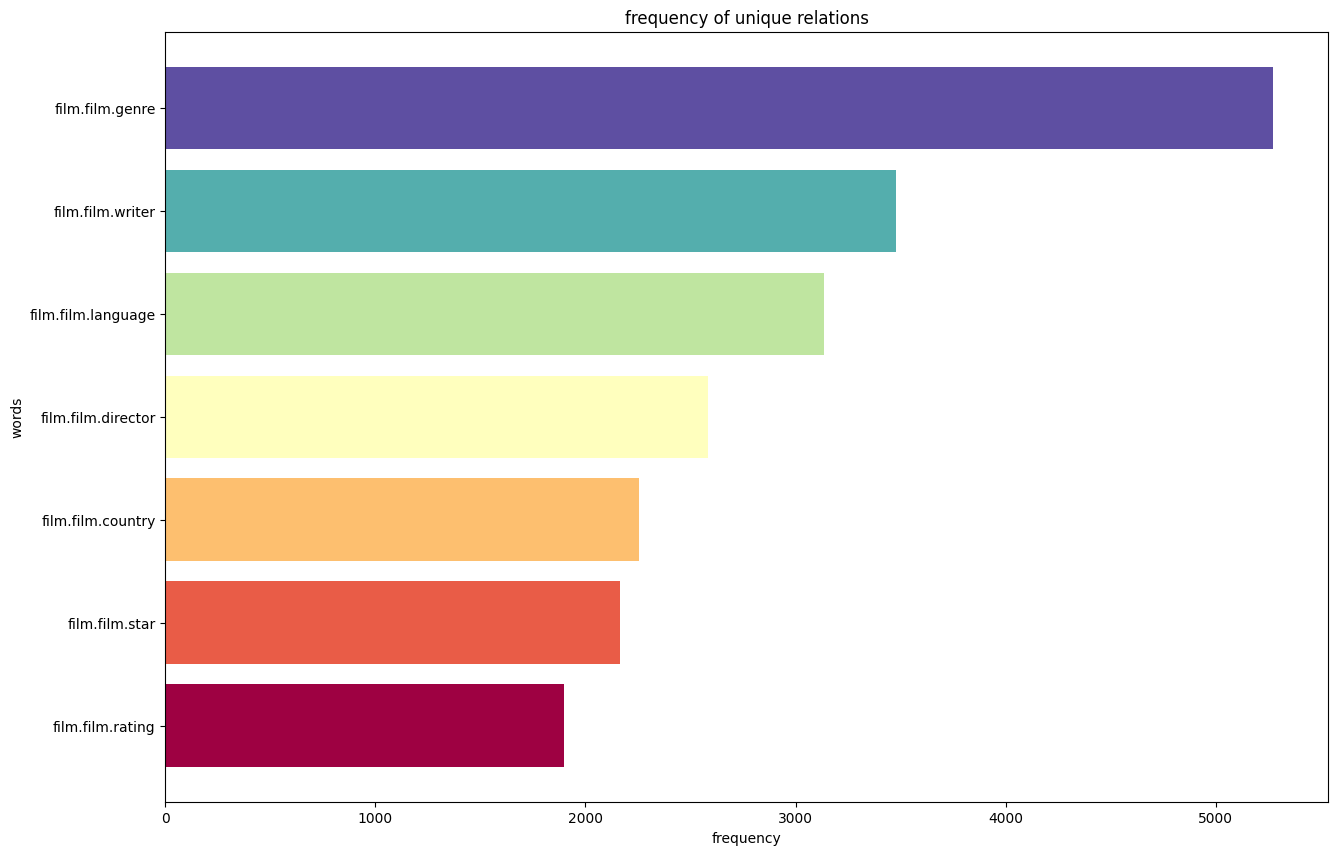

In [215]:
describe_col(kg, 'relation')

relations_count = kg['relation'].value_counts()
view_value_frequency(relations_count, colormap='Spectral', title='frequency of unique relations', limit=relations_count.shape[0])

In [216]:
describe_col(kg, 'tail')

count/no. of occurences of each unique tail out of 20782: 

2348    2252
2353    1734
2362    1227
2359    1064
2350     970
        ... 
4731       1
4732       1
4733       1
4735       1
7007       1
Name: tail, Length: 4563, dtype: int64
[2347 2348 2349 ... 7005 7006 7007]
total unique values: 4563


# Analyze what nodes are connected to who

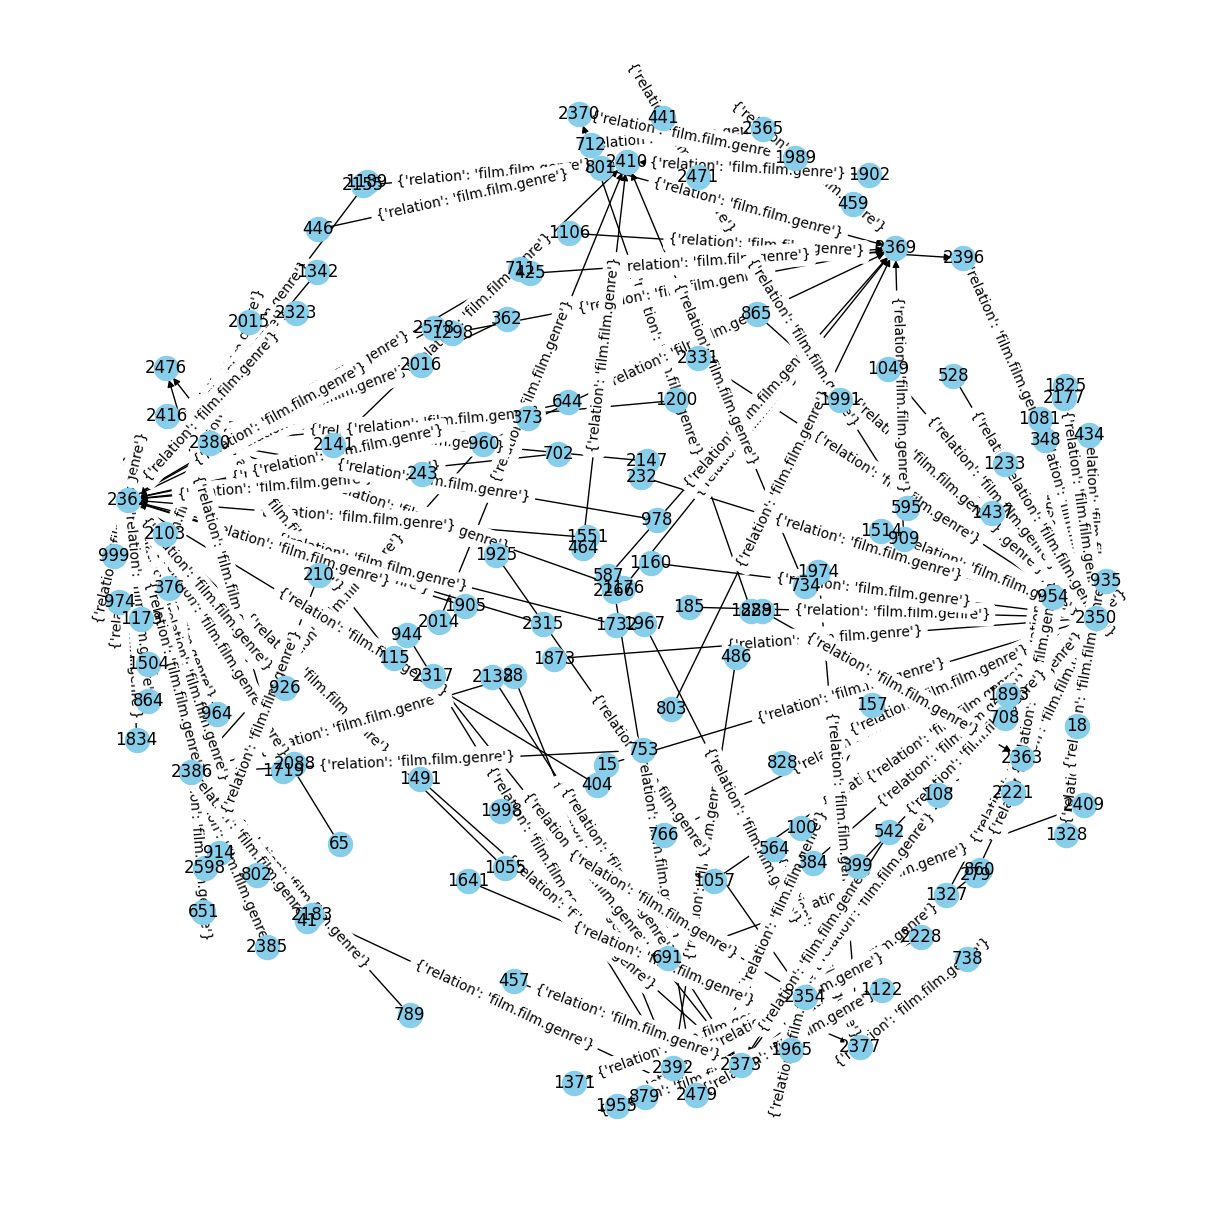

In [217]:
visualize_graph(kg)

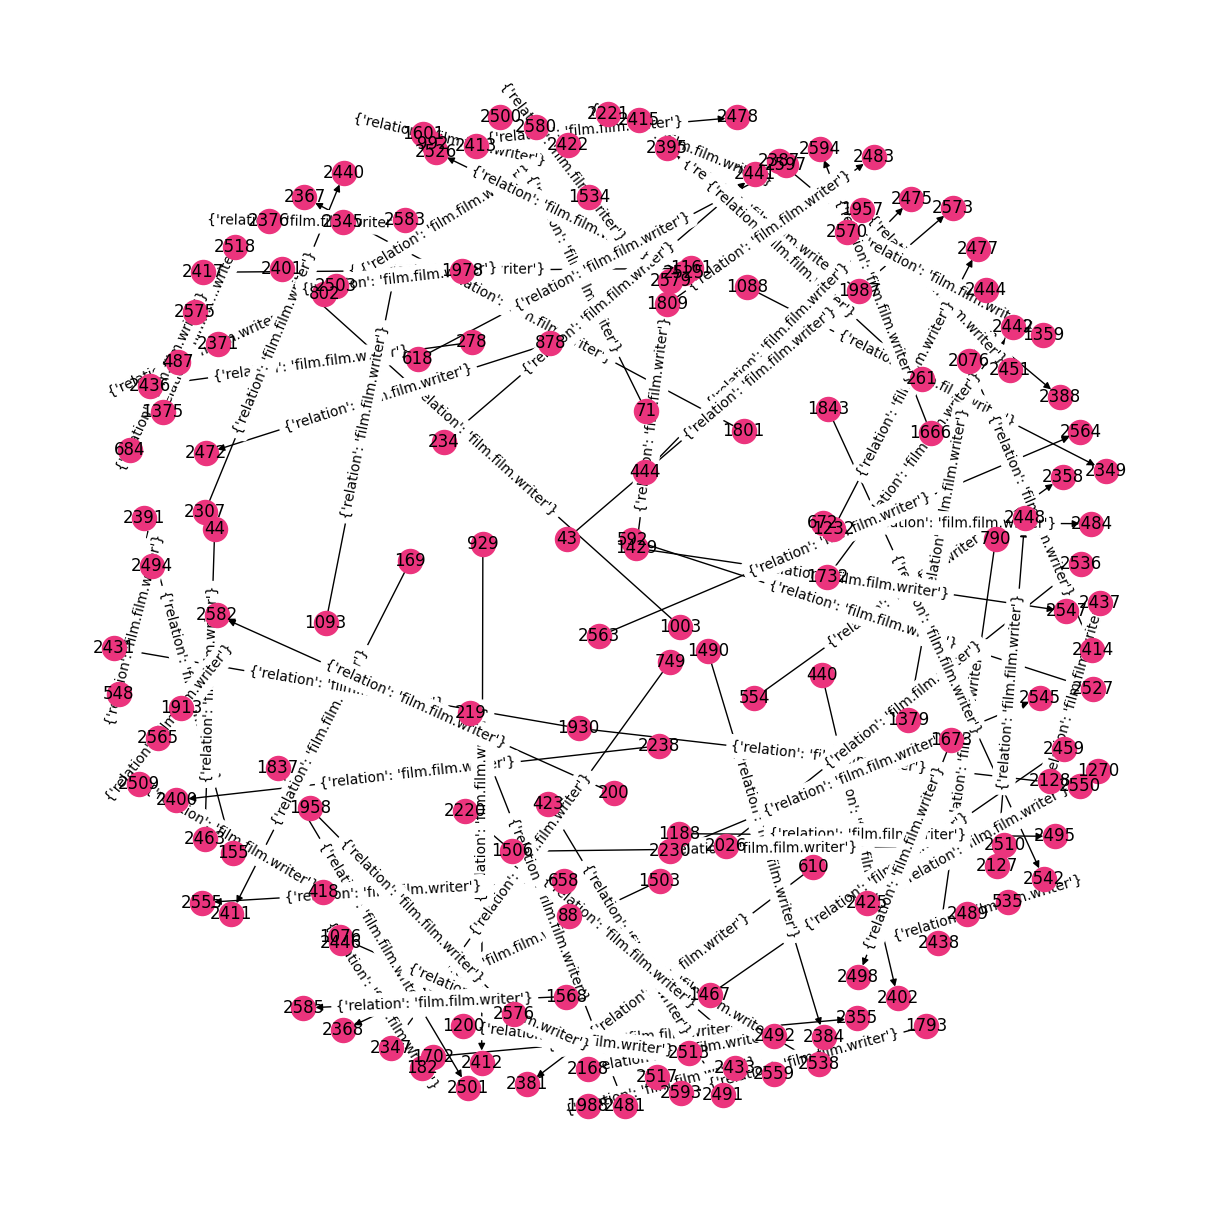

In [218]:
visualize_graph(kg, edge='film.film.writer', node_color='#eb347d')

# Does the head and tail entities appear as an item in the user item interaction data?